In [ ]:
!pip install matplotlib

## Create a fractal image (Mandelbrot set)

https://en.wikipedia.org/wiki/Mandelbrot_set

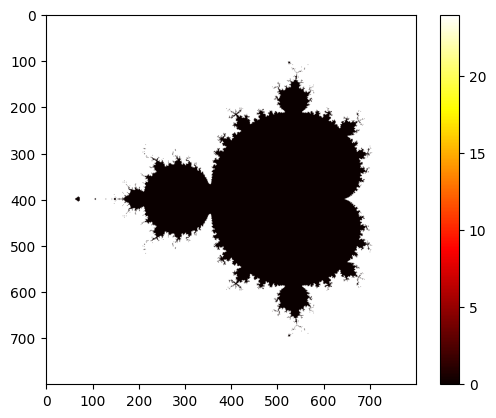

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, max_iter=25):
    """Generate a Mandelbrot fractal set"""
    y, x = np.ogrid[-1.4:1.4:h*1j, -2:0.8:w*1j]
    c = x+y*1j
    z = c.copy()
    diverge_time = np.zeros(z.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverging = np.abs(z) > 2
        diverge_time[diverging] = i
        z[diverging] = 2
        
    return diverge_time

plt.imshow(mandelbrot(800, 800), cmap='hot')
plt.colorbar()
plt.show()


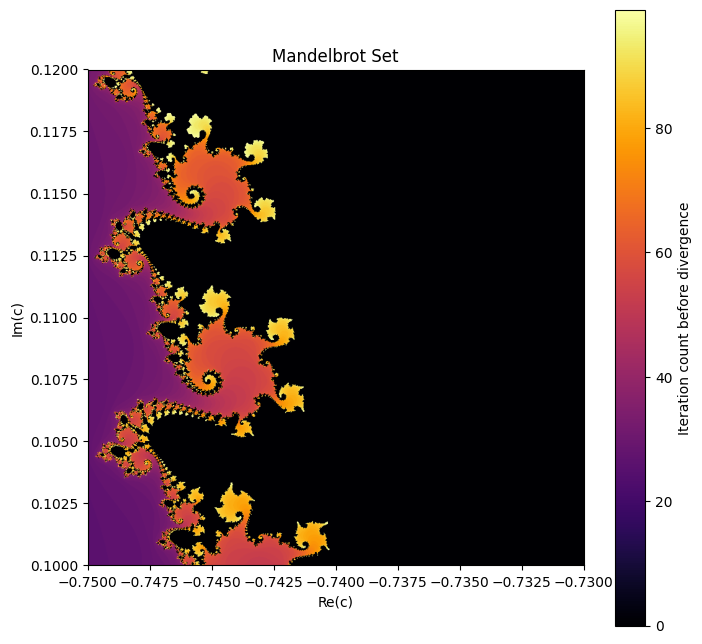

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(h, w, x_min, x_max, y_min, y_max, max_iter=50):
    """Generate a zoomed in Mandelbrot fractal set"""
    y, x = np.ogrid[y_min:y_max:h*1j, x_min:x_max:w*1j]
    c = x + y * 1j
    z = np.zeros_like(c)
    diverge_time = np.zeros(c.shape, dtype=int)

    for i in range(max_iter):
        z = z**2 + c
        diverging = np.abs(z) > 2
        diverge_time[diverging & (diverge_time == 0)] = i
        z[diverging] = 2  # freeze values to avoid overflow

    return diverge_time

# Define zoom region
x_min, x_max = -0.75, -0.73
y_min, y_max = 0.1, 0.12
width, height = 800, 800

image = mandelbrot(height, width, x_min, x_max, y_min, y_max, max_iter=100)

plt.figure(figsize=(8, 8))
plt.imshow(image, extent=[x_min, x_max, y_min, y_max], cmap='inferno')
plt.colorbar(label='Iteration count before divergence')
plt.title('Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()

## Fourier transform of a signal

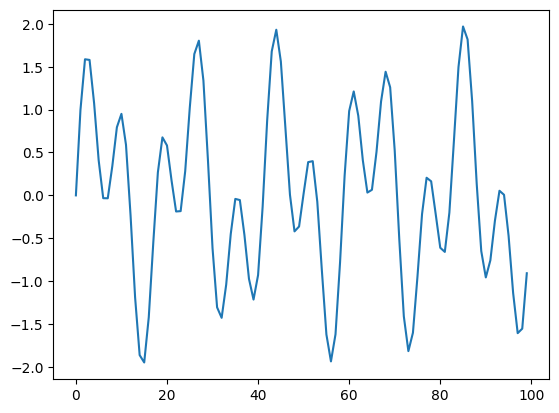

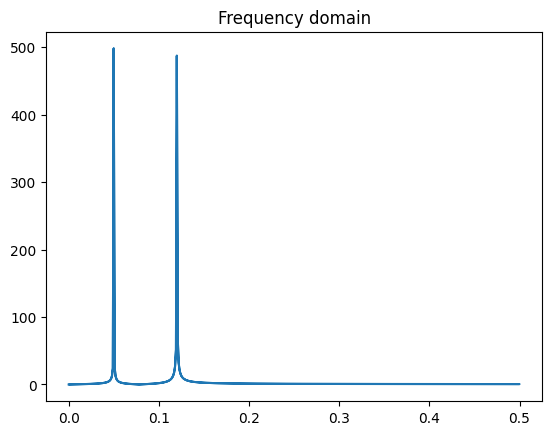

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create a signal with two frequencies
t = np.linspace(0, 1, 1000, endpoint=True)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

plt.plot(signal[:100])
plt.show()

# Compute Fourier transform
freq = np.fft.fftfreq(t.shape[-1])
spectrum = np.fft.fft(signal)

# Plot the frequencies
plt.plot(np.abs(freq), np.abs(spectrum))
plt.title('Frequency domain')
plt.show()
